<a href="https://colab.research.google.com/github/harsha0062/ml_learning/blob/main/Arbitrary_value_imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ml -working/titanic_toy.csv')

In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [ ]:
df.isnull().sum()


,0
Age,177
Fare,45
Family,0
Survived,0


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((712, 3), (179, 3))

In [ ]:
x_train.isnull().sum()

,0
Age,140
Fare,36
Family,0


In [ ]:
x_train['Age_median']=x_train['Age'].fillna(99)
x_train['Age_mean']=x_train['Age'].fillna(-1)

x_train['Fare_median']=x_train['Fare'].fillna(999)
x_train['Fare_mean']=x_train['Fare'].fillna(-1)

In [ ]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
419,10.0,24.1500,2,10.0,10.0,24.1500,24.1500
178,30.0,13.0000,0,30.0,30.0,13.0000,13.0000
270,NaN,31.0000,0,99.0,-1.0,31.0000,31.0000
259,50.0,NaN,1,50.0,50.0,999.0000,-1.0000
352,15.0,7.2292,2,15.0,15.0,7.2292,7.2292


In [ ]:
print('Original Age variable varience: ',x_train['Age'].var())
print('Age variable varience after median imputation: ',x_train['Age_median'].var())
print('Age variable varience after mean imputation: ',x_train['Age_mean'].var())

print('Original Fare variable varience: ',x_train['Fare'].var())
print('Fare variable varience after median imputation: ',x_train['Fare_median'].var())
print('Fare variable varience after mean imputation: ',x_train['Fare_mean'].var())


Original Age variable varience:  210.2517072477438
Age variable varience after median imputation:  932.9665366701436
Age variable varience after mean imputation:  315.99550362600644
Original Fare variable varience:  2761.031434948639
Fare variable varience after median imputation:  47525.47059536007
Fare variable varience after mean imputation:  2675.2394049177087


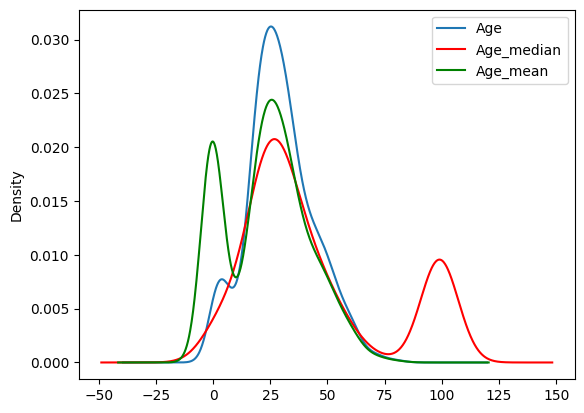

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde',ax=ax)

# variable imputed with the  median
x_train['Age_median'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


plt.show()


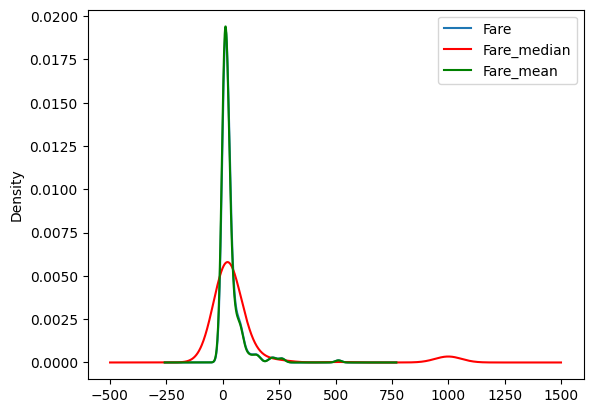

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde',ax=ax)

# variable imputed with the  median
x_train['Fare_median'].plot(kind='kde',ax=ax,color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


plt.show()


In [ ]:
x_train.cov()


,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,130.495777,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,16.878492,17.684447
Age_median,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-255.051165,-101.137070
Age_mean,210.251707,135.785804,-5.034556,-166.460682,315.995504,262.712284,124.270305
Fare_median,130.495777,2761.031435,16.878492,-255.051165,262.712284,47525.470595,1063.944817
Fare_mean,69.137162,2761.031435,17.684447,-101.137070,124.270305,1063.944817,2675.239405


In [ ]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.039967,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.046016,0.203212
Age_median,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.038303,-0.064017
Age_mean,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.067792,0.135159
Fare_median,0.039967,1.000000,0.046016,-0.038303,0.067792,1.000000,0.094357
Fare_mean,0.085422,1.000000,0.203212,-0.064017,0.135159,0.094357,1.000000


Using Sklearn

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn import impute
impute1=impute.SimpleImputer(strategy='constant',fill_value=99)
impute2=impute.SimpleImputer(strategy='constant',fill_value=99)

In [ ]:
trf=ColumnTransformer([
    ('imputer1',impute1,['Age']),
    ('imputer2',impute2,['Fare'])
],remainder='passthrough')

In [ ]:

trf.fit(x_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([99.])

In [ ]:
x_train_trf=trf.transform(x_train)
x_test_trf=trf.transform(x_test)

In [ ]:
x_train

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6
...,...,...,...
106,21.0,7.6500,0
270,NaN,31.0000,0
860,41.0,NaN,2
435,14.0,120.0000,3
